# Assignment 8 (10 Points): Pandas

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('data-sources/flights.csv')
airports = pd.read_csv('data-sources/airports.csv')

In [3]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [4]:
airports
airports_2 = airports[['faa', 'name']]
airports_2

,faa,name
0,04G,Lansdowne Airport
1,06A,Moton Field Municipal Airport
2,06C,Schaumburg Regional
3,06N,Randall Airport
4,09J,Jekyll Island Airport
...,...,...
1453,ZUN,Black Rock
1454,ZVE,New Haven Rail Station
1455,ZWI,Wilmington Amtrak Station
1456,ZWU,Washington Union Station


### Q1 (3 points): Reverse engineer the following dataframe by merging the flights and airports datasets.

,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,IAH,N37408,Newark Liberty Intl,George Bush Intercontinental
2,EWR,IAH,N12216,Newark Liberty Intl,George Bush Intercontinental
3,EWR,IAH,N667UA,Newark Liberty Intl,George Bush Intercontinental
4,EWR,IAH,N39418,Newark Liberty Intl,George Bush Intercontinental
...,...,...,...,...,...
339583,NaN,NaN,NaN,NaN,Black Rock
339584,NaN,NaN,NaN,NaN,New Haven Rail Station
339585,NaN,NaN,NaN,NaN,Wilmington Amtrak Station
339586,NaN,NaN,NaN,NaN,Washington Union Station


In [5]:
d1 = pd.merge(flights, airports,how="outer", left_on=["origin"], right_on=["faa"])
d1_new = d1.rename(columns={'name': 'origin_name'})
d2_new = pd.merge(d1_new, airports, how="outer",left_on=["dest"], right_on=["faa"])
d3_new = d2_new.rename(columns={'name': 'dest_name'})
final = d3_new[['origin','dest','tailnum','origin_name','dest_name']]
final

,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,IAH,N37408,Newark Liberty Intl,George Bush Intercontinental
2,EWR,IAH,N12216,Newark Liberty Intl,George Bush Intercontinental
3,EWR,IAH,N667UA,Newark Liberty Intl,George Bush Intercontinental
4,EWR,IAH,N39418,Newark Liberty Intl,George Bush Intercontinental
...,...,...,...,...,...
339583,NaN,NaN,NaN,NaN,Black Rock
339584,NaN,NaN,NaN,NaN,New Haven Rail Station
339585,NaN,NaN,NaN,NaN,Wilmington Amtrak Station
339586,NaN,NaN,NaN,NaN,Washington Union Station


### Q2 (4 points): Use the resulting dataframe from Q1 to reverse engineer the following results (i.e., sorting the count of flights between the origin and destination airports).

tailnum
origin_name         dest_name                               
John F Kennedy Intl Los Angeles Intl                   11237
La Guardia          Hartsfield Jackson Atlanta Intl    10262
                    Chicago Ohare Intl                  8717
John F Kennedy Intl San Francisco Intl                  8174
La Guardia          Charlotte Douglas Intl              6114
...                                                      ...
John F Kennedy Intl Memphis Intl                           1
                    Lambert St Louis Intl                  1
                    Birmingham Intl                        1
La Guardia          Blue Grass                             1
Newark Liberty Intl La Guardia                             0

[217 rows x 1 columns]

In [6]:
Q2=final.groupby(["origin_name","dest_name"]).count()
Q2=Q2.drop(["origin","dest"],1)
Q2.sort_values(by="tailnum",ascending=False)

tailnum
origin_name         dest_name                               
John F Kennedy Intl Los Angeles Intl                   11237
La Guardia          Hartsfield Jackson Atlanta Intl    10262
                    Chicago Ohare Intl                  8717
John F Kennedy Intl San Francisco Intl                  8174
La Guardia          Charlotte Douglas Intl              6114
...                                                      ...
John F Kennedy Intl Memphis Intl                           1
                    Lambert St Louis Intl                  1
                    Birmingham Intl                        1
La Guardia          Blue Grass                             1
Newark Liberty Intl La Guardia                             0

[217 rows x 1 columns]

### Q3 (3 points): Compute and plot the rolling mean and standard deviation of the price ratio between GOOG and NASDAQ.

- UCB stands for Upper Confidence Bound and is computed using mean + std.
- LCB stands for Lower Confidence Bound and is computed using mean - std.

In [7]:
GOOG = pd.read_csv('data-sources/GOOG.csv', index_col = 0, parse_dates = ['Date'])
NASDAQ = pd.read_csv('data-sources/NASDAQ.csv', index_col = 0, parse_dates = ['Date'])

GOOG = GOOG['Close']
NASDAQ = NASDAQ['Close']

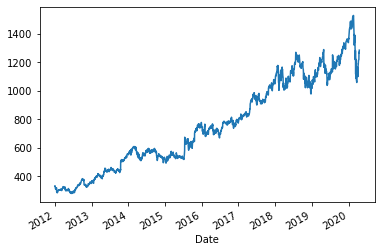

In [8]:
GOOG.plot()

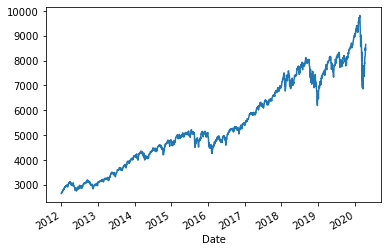

In [9]:
NASDAQ.plot()

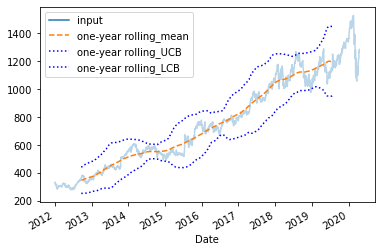

In [10]:

rolling = GOOG.rolling(365, center=True)

data = pd.DataFrame({'input': GOOG,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_UCB': rolling.mean() + 2.0*rolling.std(),
                     'one-year rolling_LCB': rolling.mean() - 2.0*rolling.std()})
ax = data.plot(style=['-', '--', 'b:', 'b:'])
ax.lines[0].set_alpha(0.3)

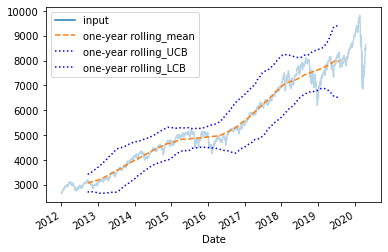

In [11]:
rolling = NASDAQ.rolling(365, center=True)

data = pd.DataFrame({'input': NASDAQ,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_UCB': rolling.mean() + 2.0*rolling.std(),
                     'one-year rolling_LCB': rolling.mean() - 2.0*rolling.std()})
ax = data.plot(style=['-', '--', 'b:', 'b:'])
ax.lines[0].set_alpha(0.3)

In [12]:
GOOG

Date
2012-01-03     331.462585
2012-01-04     332.892242
2012-01-05     328.274536
2012-01-06     323.796326
2012-01-09     310.067780
                 ...     
2020-04-13    1217.560059
2020-04-14    1269.229980
2020-04-15    1262.469971
2020-04-16    1263.469971
2020-04-17    1283.250000
Name: Close, Length: 2086, dtype: float64

In [13]:
NASDAQ

Date
2012-01-03    2648.719971
2012-01-04    2648.360107
2012-01-05    2669.860107
2012-01-06    2674.219971
2012-01-09    2676.560059
                 ...     
2020-04-13    8192.419922
2020-04-14    8515.740234
2020-04-15    8393.179688
2020-04-16    8532.360352
2020-04-17    8650.140625
Name: Close, Length: 2086, dtype: float64

In [14]:
data_NASDAQ = pd.DataFrame({'input': NASDAQ})
data_GOOG = pd.DataFrame({'input': GOOG}) 
final_data = data_NASDAQ.merge(data_GOOG, on='Date')
final_data = final_data.rename(columns={'input_x': 'NASDAQ'})
final_data = final_data.rename(columns={'input_y': 'GOOG'})
final_data['ratio'] = final_data['GOOG']/final_data['NASDAQ']
final_data

,NASDAQ,GOOG,ratio
Date,,,
2012-01-03,2648.719971,331.462585,0.125141
2012-01-04,2648.360107,332.892242,0.125697
2012-01-05,2669.860107,328.274536,0.122956
2012-01-06,2674.219971,323.796326,0.121081
2012-01-09,2676.560059,310.067780,0.115846
...,...,...,...
2020-04-13,8192.419922,1217.560059,0.148620
2020-04-14,8515.740234,1269.229980,0.149045
2020-04-15,8393.179688,1262.469971,0.150416


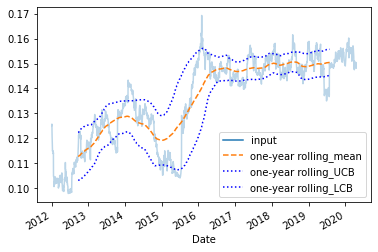

In [15]:
new_rolling = final_data['ratio'].rolling(365, center=True)
data = pd.DataFrame({'input': final_data['ratio'],
                     'one-year rolling_mean': new_rolling.mean(),
                     'one-year rolling_UCB': new_rolling.mean() + 1*new_rolling.std(),
                     'one-year rolling_LCB': new_rolling.mean() - 1*new_rolling.std()})
ax = data.plot(style=['-', '--', 'b:', 'b:'])
ax.lines[0].set_alpha(0.3)

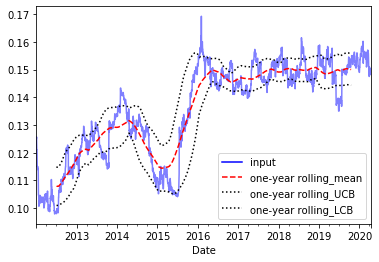